In [1]:
from pyforest import *

In [2]:
train = pd.read_csv('Train_UWu5bXk.txt')
test = pd.read_csv('Test_u94Q5KV.txt')

In [3]:
print('Train',train.shape)
print('Test',test.shape)

Train (8523, 12)
Test (5681, 11)


In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.isnull().sum()[train.isnull().sum()!=0] #only two variables have null values in them

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [7]:
test.isnull().sum()[test.isnull().sum()!=0] #only two variables have null values in them

Item_Weight     976
Outlet_Size    1606
dtype: int64

# Uni Variate Analysis

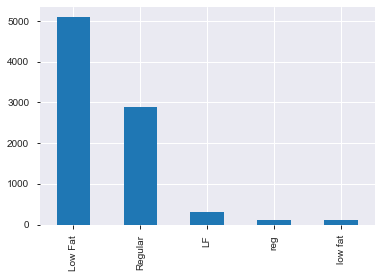

In [8]:
train.Item_Fat_Content.value_counts().plot(kind='bar')
plt.show()

In [9]:
#Low,Lf,low fat are same category and Regular and reg are same category
#Low fat item sell more than regular items

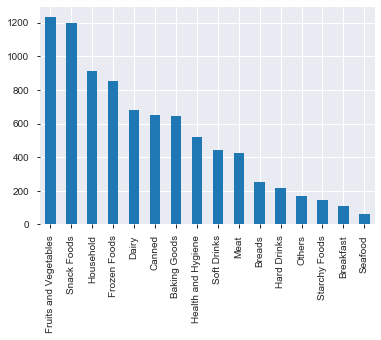

In [10]:
train.Item_Type.value_counts().plot(kind='bar')
plt.show()

In [11]:
#Fruits Vegetables, Snacks Foods, Household, Frozen foods, Dairy are the highest selling item_type

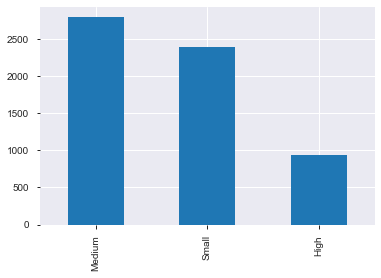

In [12]:
train.Outlet_Size.value_counts().plot(kind='bar')
plt.show()

In [13]:
#medium has maxiumum sale

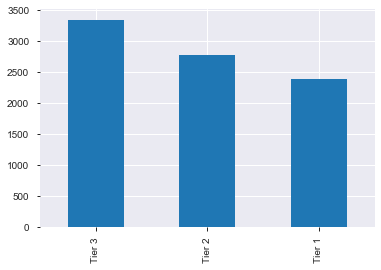

In [14]:
train.Outlet_Location_Type.value_counts().plot(kind='bar')
plt.show()

In [15]:
#tier 3 has maximum sale

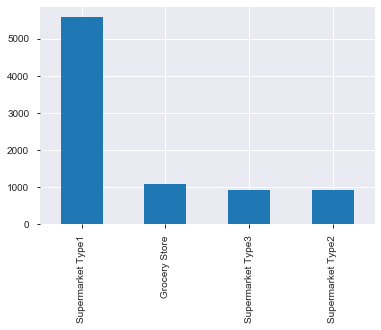

In [16]:
train.Outlet_Type.value_counts().plot(kind='bar')
plt.show()

In [17]:
#supermarket type1 has the highest sale

In [18]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
#the minimum item visibility is 0 which is not possible hence will have to treat this

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


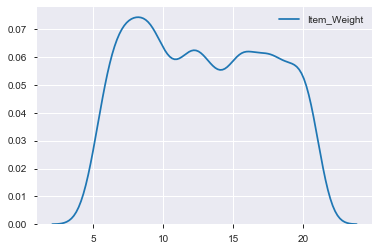

In [20]:
sns.kdeplot(train.Item_Weight)
plt.show()

In [21]:
#item_weight does not show specific shape

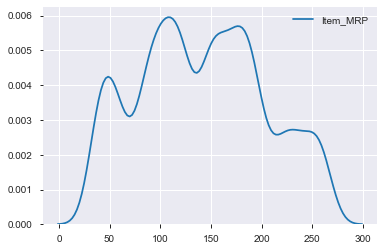

In [22]:
sns.kdeplot(train.Item_MRP)
plt.show()

In [23]:
#4 diff distribution can be seen here

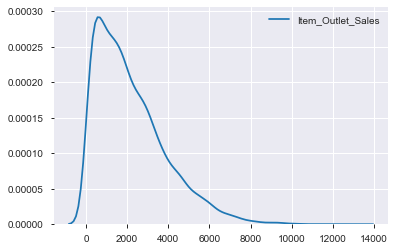

In [24]:
sns.kdeplot(train.Item_Outlet_Sales)

In [25]:
#the item_outlet_sales is right skewed..there is peakedness

# Bi Varaite Analysis

In [26]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


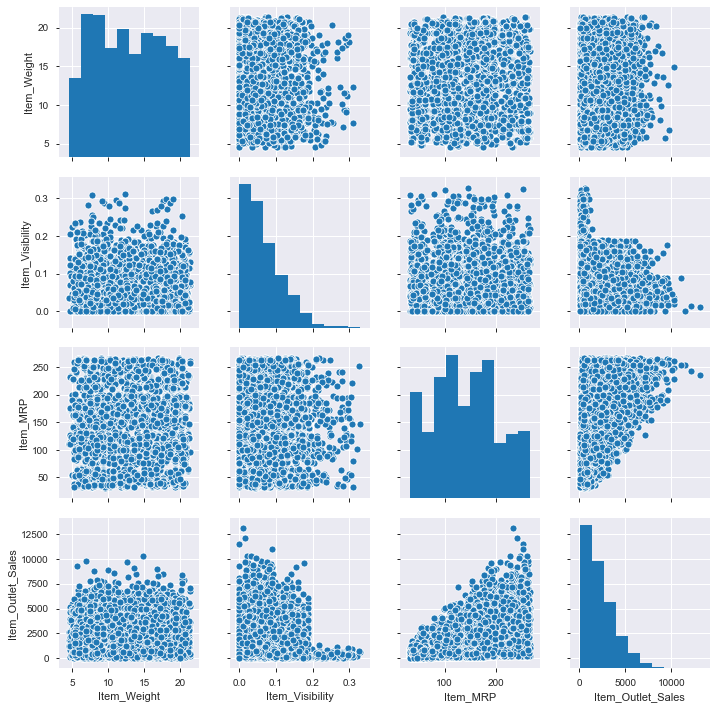

In [27]:
sns.pairplot(train[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']])

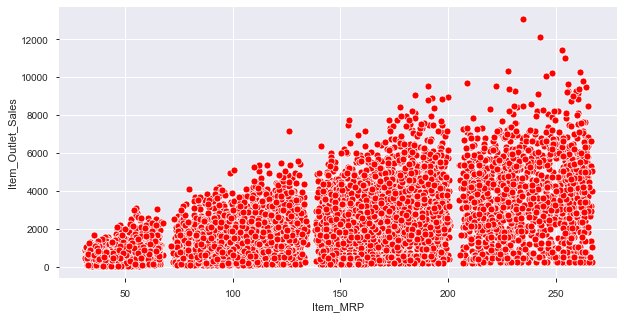

In [28]:
plt.figure(figsize = [10,5])
sns.scatterplot(x = train.Item_MRP,
            y = train.Item_Outlet_Sales,color = 'red')

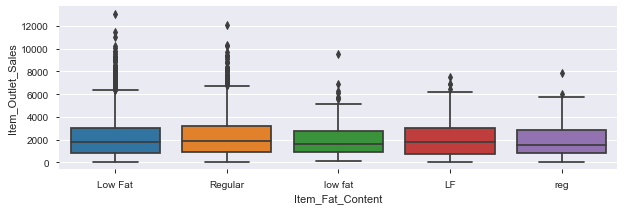

In [29]:
plt.figure(figsize = (10,3))
sns.boxplot(train.Item_Fat_Content,train.Item_Outlet_Sales)

In [30]:
#Outliers can be seen here..

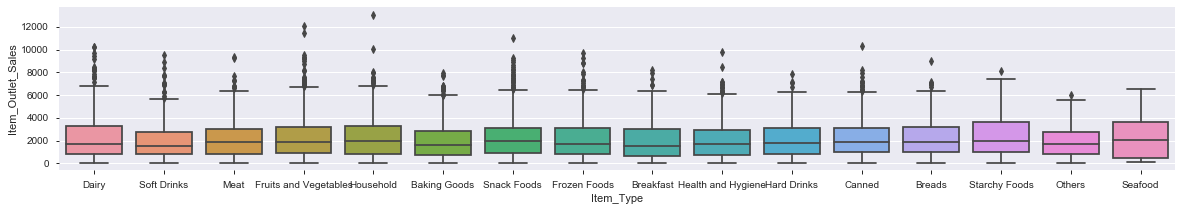

In [31]:
plt.figure(figsize = (20,3))
sns.boxplot(train.Item_Type,train.Item_Outlet_Sales)

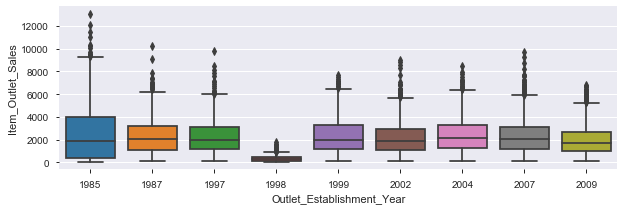

In [32]:
plt.figure(figsize = (10,3))
sns.boxplot(train.Outlet_Establishment_Year,train.Item_Outlet_Sales)

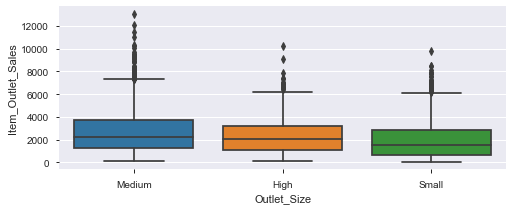

In [33]:
plt.figure(figsize = (8,3))
sns.boxplot(train.Outlet_Size,train.Item_Outlet_Sales)

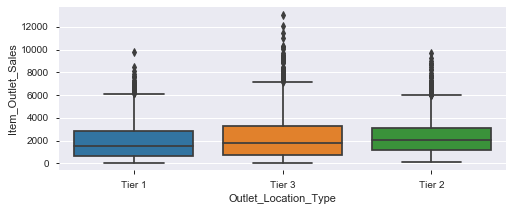

In [34]:
plt.figure(figsize = (8,3))
sns.boxplot(train.Outlet_Location_Type,train.Item_Outlet_Sales)

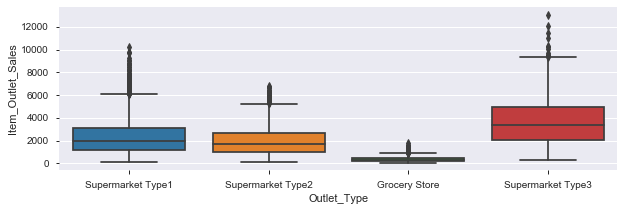

In [35]:
plt.figure(figsize = (10,3))
sns.boxplot(train.Outlet_Type,train.Item_Outlet_Sales)

# Treating null values and anamolies in dataset

### Replacing LF,low fat with Low Fat and reg with Regular in Item Fat Content

In [36]:
combined_data = pd.concat([train,test],ignore_index=True,sort=False)

In [37]:
combined_data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [38]:
combined_data.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

In [39]:
combined_data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

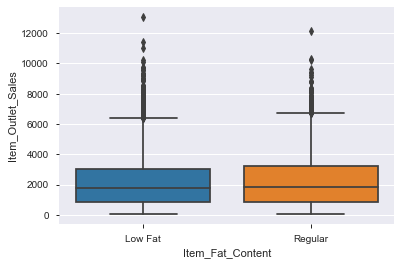

In [40]:
sns.boxplot(combined_data.Item_Fat_Content,combined_data.Item_Outlet_Sales)

In [41]:
#both the categories are right skewed and have outliers

# Treating Missing Values

In [42]:
combined_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [43]:
combined_data.isnull().sum()[combined_data.isnull().sum()!=0] #only two variables have null values in them

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [44]:
combined_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Treating Outlet_Size3

In [45]:
combined_data[combined_data.Outlet_Size.isnull()]['Outlet_Location_Type'].value_counts()
#Only tier 2 and 3 have null values

Tier 2    3091
Tier 3     925
Name: Outlet_Location_Type, dtype: int64

In [46]:
combined_data.groupby(['Outlet_Location_Type','Outlet_Size'])['Outlet_Type'].value_counts()

Outlet_Location_Type  Outlet_Size  Outlet_Type      
Tier 1                Medium       Supermarket Type1    1550
                      Small        Supermarket Type1    1550
                                   Grocery Store         880
Tier 2                Small        Supermarket Type1    1550
Tier 3                High         Supermarket Type1    1553
                      Medium       Supermarket Type3    1559
                                   Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [47]:
#Tier 2 only has small outlet_size,hence imputed the null values with outlet location type as tier2 with small
combined_data.loc[combined_data.Outlet_Location_Type=='Tier 2','Outlet_Size']='Small'

In [48]:
combined_data[combined_data.Outlet_Size.isnull()]['Outlet_Type'].value_counts()

Grocery Store    925
Name: Outlet_Type, dtype: int64

In [49]:
#Outlet_Location_Type = 3 and Outlet_Type = Grocery is the pattern which is remained to impute
#Since Grocery Store is only available in Small Outlet_Type..we can impute such recoreds with Small
combined_data.loc[combined_data.Outlet_Location_Type=='Tier 3','Outlet_Size']='Small'

In [50]:
combined_data.isnull().sum()[combined_data.isnull().sum()!=0] #only two variables have null values in them

Item_Weight          2439
Item_Outlet_Sales    5681
dtype: int64

### Treating Item_Weight

In [51]:
combined_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [52]:
combined_data[combined_data.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Small,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Small,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Small,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Small,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Small,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Small,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [53]:
combined_data.loc[combined_data.Item_Identifier == 'FDP10','Item_Weight']

7         NaN
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327     NaN
Name: Item_Weight, dtype: float64

In [54]:
combined_data['Item_Weight'] = combined_data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [55]:
combined_data.loc[combined_data.Item_Identifier == 'FDP10','Item_Weight']

7        19.0
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327    19.0
Name: Item_Weight, dtype: float64

In [56]:
combined_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### Treating Item_Visibility

In [57]:
combined_data[combined_data['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Small,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Small,Tier 3,Supermarket Type2,3068.0064
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,Small,Tier 2,Supermarket Type1,2428.8384
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Small,Tier 3,Supermarket Type2,3185.1872
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,Small,Tier 2,Supermarket Type1,4604.6728
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,Small,Tier 2,Supermarket Type1,5305.0944


In [58]:
combined_data['Item_Visibility'] = combined_data.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.replace(0,x.median()))

In [59]:
combined_data[combined_data['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
651,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,46.5402,OUT010,1998,Small,Tier 3,Grocery Store,229.7010
4208,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.9402,OUT027,1985,Small,Tier 3,Supermarket Type3,872.8638
4791,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.2402,OUT018,2009,Small,Tier 3,Supermarket Type2,1148.5050
12966,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,44.1402,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
13259,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [60]:
combined_data[(combined_data.Item_Fat_Content == 'Low Fat')  &
         (combined_data.Item_Weight == 11.8) &
          (combined_data.Item_Type == 'Fruits and Vegetables') ]['Item_Visibility']

10       0.000000
651      0.000000
779      0.121848
3370     0.122290
4791     0.000000
6321     0.121501
12966    0.000000
13259    0.000000
Name: Item_Visibility, dtype: float64

In [61]:
combined_data.loc[combined_data.Item_Visibility==0, 'Item_Visibility'] = 0.121501

In [62]:
combined_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Feature Engineering

### Item Identifier

In [63]:
#The Item_Identifier's first 2 letter identify the category of item whether it is food,drinks or non consumebale items

In [64]:
combined_data['Item_Identifier1']=combined_data.Item_Identifier.apply(lambda x:x[:2])

In [65]:
combined_data['Item_Identifier1'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier1, dtype: int64

### Outlet_Age

In [66]:
#The established year of outlet can give how old the outlet is
combined_data.Outlet_Establishment_Year[0]

1999

In [67]:
#The data is of 2013.Hence we subtract 1999 from 2013
2013 - combined_data.Outlet_Establishment_Year[0]

14

In [68]:
combined_data['Outlet_Age'] = combined_data.Outlet_Establishment_Year.apply(lambda x : 2013 - x)

In [69]:
combined_data.Outlet_Age.value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Age, dtype: int64

### Item Category

In [70]:
combined_data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [71]:
perishable = ['Dairy','Meat','Fruits and Vegetables','Breakfast','Breads','Seafood']

In [72]:
def itemcat(x):
    if (x in perishable):
        return('Perishables')
    else:
        return('Non Perishables')

In [73]:
combined_data['Item_TypeCat'] = combined_data.Item_Type.apply(itemcat)

### Outlet Identifier

In [74]:
combined_data.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [75]:
combined_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [76]:
#Outlet Category
def outcat(x):
    if(x=='OUT027'):
        return('High Sales Outlet')
    elif((x == 'OUT010') | (x == 'OUT019')):
        return('Low Sales Outlet')
    else:
        return('Medium Sales Outlet')

In [77]:
combined_data['Outlet_Cat'] = combined_data.Outlet_Identifier.apply(outcat)

In [78]:
combined_data.Outlet_Cat.value_counts()

Medium Sales Outlet    10840
Low Sales Outlet        1805
High Sales Outlet       1559
Name: Outlet_Cat, dtype: int64

In [79]:
combined_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier1,Outlet_Age,Item_TypeCat,Outlet_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,Perishables,Medium Sales Outlet
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Small,Tier 3,Supermarket Type2,443.4228,DR,4,Non Perishables,Medium Sales Outlet
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,Perishables,Medium Sales Outlet
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15,Perishables,Low Sales Outlet
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,NC,26,Non Perishables,Medium Sales Outlet


In [80]:
combined_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Identifier1', 'Outlet_Age',
       'Item_TypeCat', 'Outlet_Cat'],
      dtype='object')

In [97]:
combined_new=combined_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1)

In [98]:
combined_new.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Identifier1', 'Outlet_Age', 'Item_TypeCat',
       'Outlet_Cat'],
      dtype='object')

In [99]:
combined_new['Outlet_Age'] = combined_new['Outlet_Age'].astype('object')

In [100]:
combined_new.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Item_Identifier1         object
Outlet_Age               object
Item_TypeCat             object
Outlet_Cat               object
dtype: object

In [107]:
combined_new.Outlet_Cat.value_counts()

Medium Sales Outlet    10840
Low Sales Outlet        1805
High Sales Outlet       1559
Name: Outlet_Cat, dtype: int64

In [108]:
train_clean=combined_new[:8523]
test_clean=combined_new[8523:]

In [109]:
train_clean=pd.get_dummies(train_clean)
test_clean=pd.get_dummies(test_clean)
test_clean1 = test_clean.drop('Item_Outlet_Sales',axis=1)

In [110]:
X = train_clean.drop('Item_Outlet_Sales',axis=1)
y = train_clean.Item_Outlet_Sales

In [111]:
train_clean.shape

(8523, 32)

In [113]:
test_clean.shape

(5681, 32)

In [114]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
pred = xgb.fit(X,y).predict(test_clean1)

[23:13:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [115]:
solution =  pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':pred})

In [116]:
solution.to_csv('Predicted_Values_git_XGB.csv',index=False) #to csv is only compatible with dataframe

# Feature Selection

In [ ]:
#Backward Elimination
cols = list(X1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    lin_reg = sm.OLS(y,X_1).fit()
    p = pd.Series(lin_reg.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
X1_new = X1[['Item_MRP', 'Item_Fat_Content_Low Fat', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type3']]

In [ ]:
X_train = X1_new
test_new = test_clean[['Item_MRP', 'Item_Fat_Content_Low Fat', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type3']]

In [ ]:
from xgboost.sklearn import XGBRegressor
lr = XGBRegressor()
pred = lr.fit(X_train,y).predict(test_new)

In [ ]:
solution =  pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':pred})

In [ ]:
solution.to_csv('Predicted_Valuesvthcg.csv',index=False) #to csv is only compatible with dataframe